In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
import os

from sklearn.model_selection import RandomizedSearchCV,GridSearchCV,train_test_split
from sklearn.preprocessing import OneHotEncoder,LabelEncoder, StandardScaler, MinMaxScaler

In [2]:
df = pd.read_csv(r'C:\Users\23873\OneDrive - Varroc Engineering Ltd\personal data\Regression Models\ds_salaries.csv')
df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [3]:
df.drop(['Unnamed: 0'],axis=1,inplace = True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary              607 non-null    int64 
 5   salary_currency     607 non-null    object
 6   salary_in_usd       607 non-null    int64 
 7   employee_residence  607 non-null    object
 8   remote_ratio        607 non-null    int64 
 9   company_location    607 non-null    object
 10  company_size        607 non-null    object
dtypes: int64(4), object(7)
memory usage: 52.3+ KB


In [5]:
df.isna().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [6]:
df.drop(['salary','salary_currency'], axis=1, inplace = True)

In [7]:
df.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,US,50,US,L


In [8]:
df. rename(columns = {'salary_in_usd':'salary'}, inplace = True)

In [9]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,US,50,US,L


In [10]:
print(df['work_year'].value_counts())
print('\n',df['experience_level'].value_counts())
print('\n',df['employment_type'].value_counts())
print('\n',df['job_title'].value_counts())
print('\n',df['remote_ratio'].value_counts())
#print('\n',df['company_location'].value_counts())
print('\n',df['company_size'].value_counts())

2022    318
2021    217
2020     72
Name: work_year, dtype: int64

 SE    280
MI    213
EN     88
EX     26
Name: experience_level, dtype: int64

 FT    588
PT     10
CT      5
FL      4
Name: employment_type, dtype: int64

 Data Scientist                              143
Data Engineer                               132
Data Analyst                                 97
Machine Learning Engineer                    41
Research Scientist                           16
Data Science Manager                         12
Data Architect                               11
Big Data Engineer                             8
Machine Learning Scientist                    8
Data Science Consultant                       7
Director of Data Science                      7
Principal Data Scientist                      7
AI Scientist                                  7
Data Analytics Manager                        7
BI Data Analyst                               6
Computer Vision Engineer                      6
Lead Da

### What is the distribution of Categorical Variables?

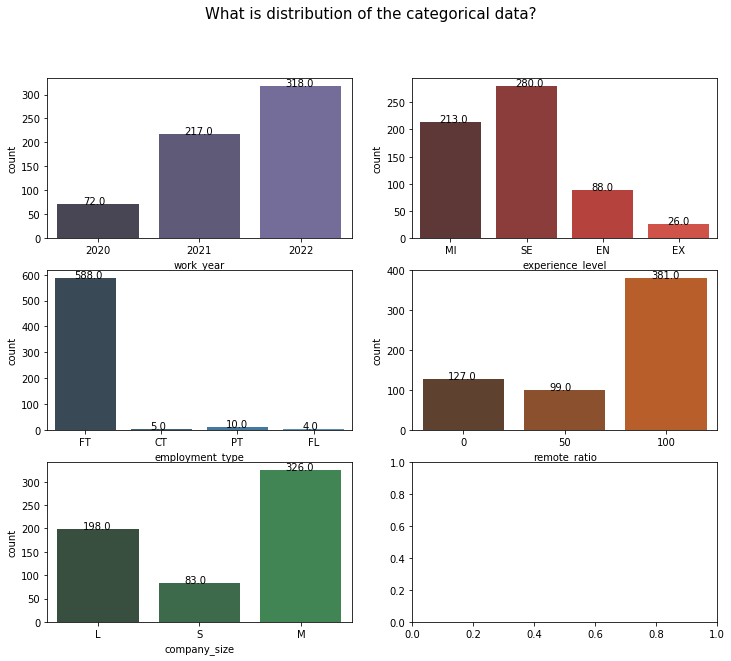

In [11]:
figure,axes = plt.subplots(3,2,figsize=(12,10))
ax1= sns.countplot(ax=axes[0,0],data=df, x='work_year',palette= sns.color_palette('Purples_d'))
ax2= sns.countplot(ax=axes[0,1],data =df,x='experience_level',palette=sns.color_palette('Reds_d'))
ax3= sns.countplot(ax=axes[1,0],data=df,x='employment_type',palette=sns.color_palette('Blues_d'))
ax4= sns.countplot(ax=axes[1,1],data=df,x='remote_ratio',palette=sns.color_palette('Oranges_d'))
ax5= sns.countplot(ax=axes[2,0],data=df,x='company_size',palette=sns.color_palette('Greens_d'))
for p in ax1.patches:
    ax1.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
for p in ax2.patches:
    ax2.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
for p in ax3.patches:
    ax3.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
for p in ax4.patches:
    ax4.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
for p in ax5.patches:
    ax5.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
figure.suptitle("What is distribution of the categorical data?", fontsize=15)
plt.show()

plt.show()

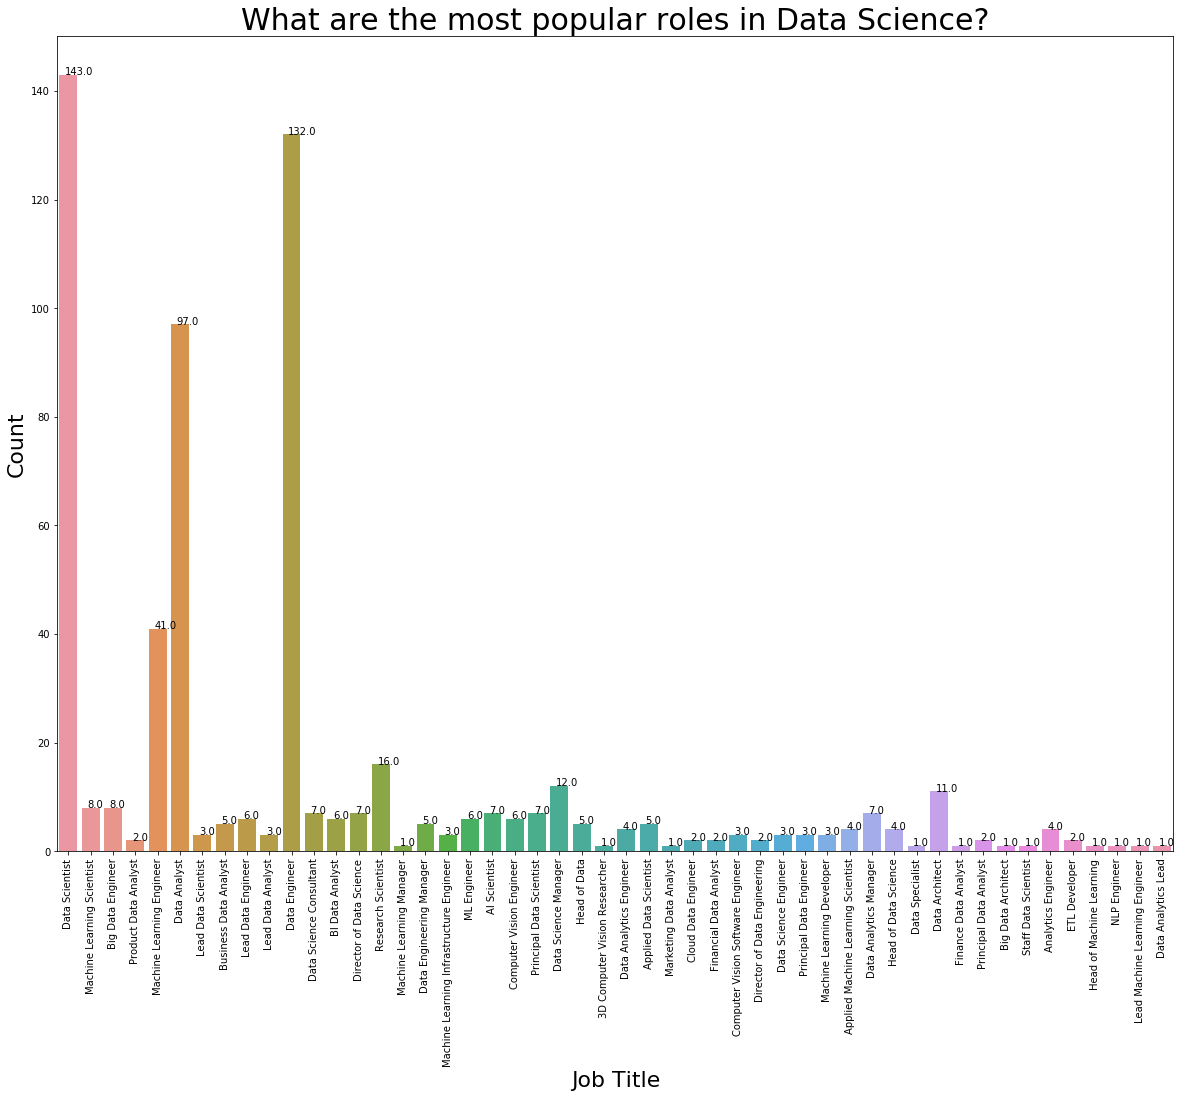

In [12]:
plt.figure(figsize=(20,15))
ax=sns.countplot(data=df, x="job_title")
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.xticks(rotation=90)
plt.title("What are the most popular roles in Data Science?",fontsize=30)
plt.xlabel("Job Title",fontsize=22)
plt.ylabel("Count",fontsize=22)
plt.show()

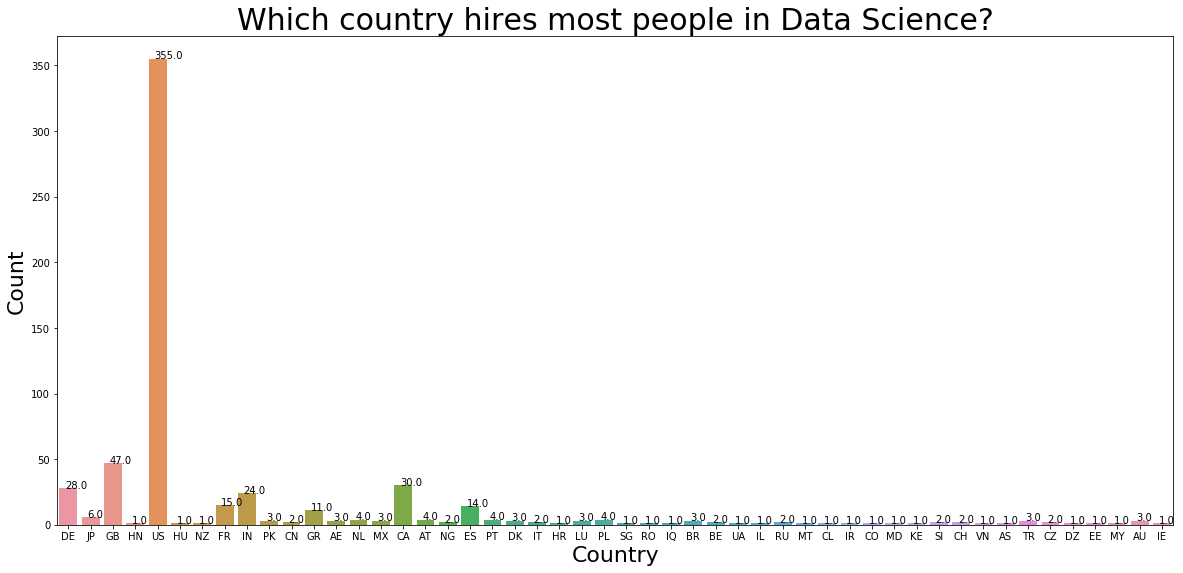

In [13]:
plt.figure(figsize=(20,9))
ax=sns.countplot(data=df, x="company_location")
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

plt.title("Which country hires most people in Data Science?",fontsize=30)
plt.xlabel("Country",fontsize=22)
plt.ylabel("Count",fontsize=22)

plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0,0.5,'Density')

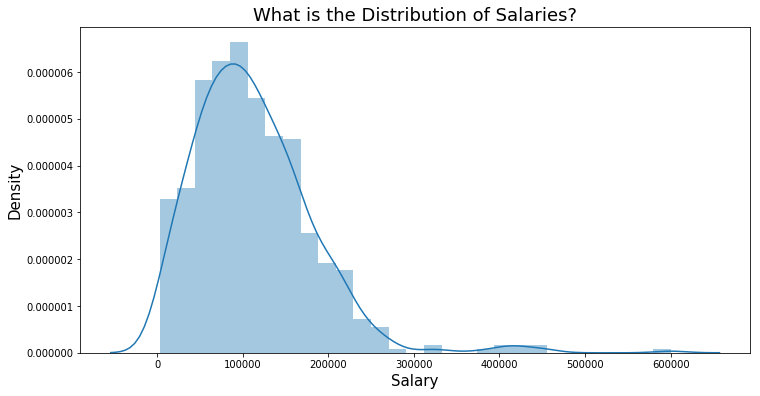

In [14]:
plt.figure(figsize=(12,6))
sns.distplot(df["salary"])
plt.title("What is the Distribution of Salaries?",fontsize=18)
plt.xlabel("Salary",fontsize=15)
plt.ylabel("Density",fontsize=15)

In [15]:
def univariate_multi_plot(df=df, x=None, xlabel=None, y=None,ylabel=None,palette=None,title=None):
    fig, ax = plt.subplots(1, 2, figsize=(20, 7))
    sns.boxplot(data=df, x=x, ax=ax[0], y=y,palette=palette)
    sns.stripplot(data=df,x=x,ax=ax[1],y=y,palette=palette)
    ax[0].set_xlabel(xlabel=xlabel, size=15)
    ax[0].set_ylabel(ylabel=ylabel,size=15)
    ax[1].set_xlabel(xlabel=xlabel, size=15)
    ax[1].set_ylabel(ylabel=ylabel,size=15)
    fig.suptitle(title, fontsize=20)

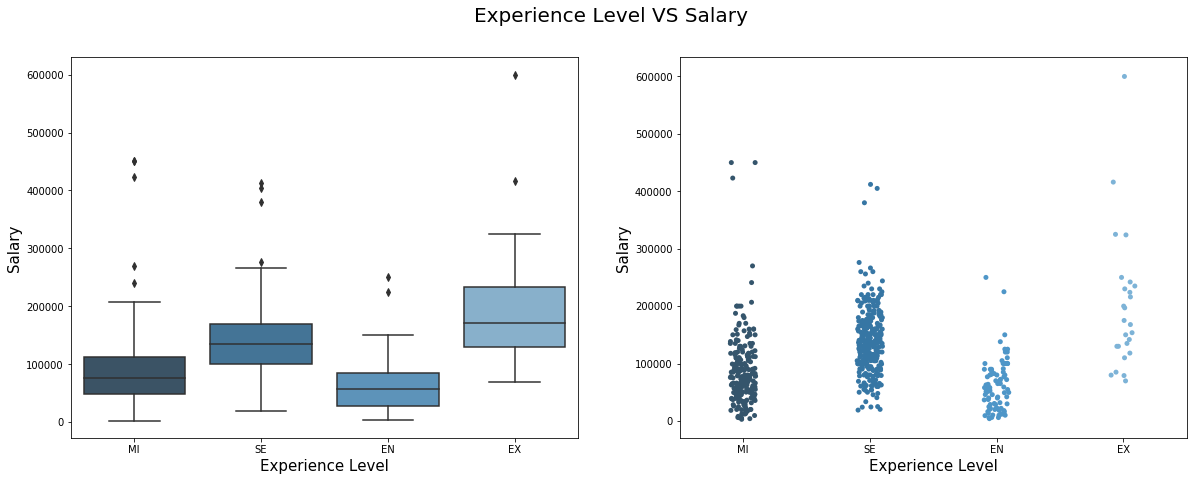

In [16]:
univariate_multi_plot(x="experience_level",xlabel="Experience Level",y="salary",ylabel="Salary",palette="Blues_d",title="Experience Level VS Salary")

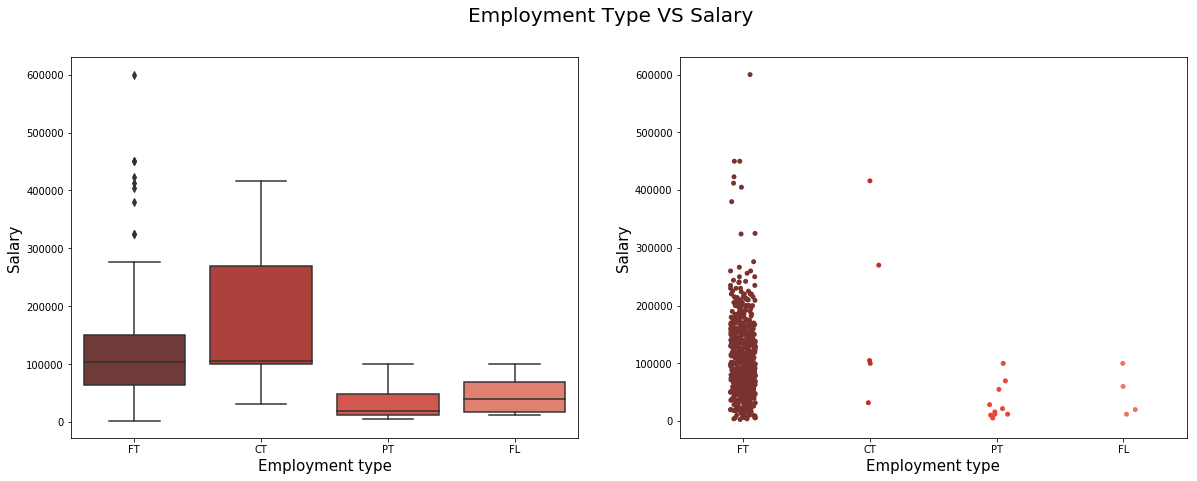

In [17]:
univariate_multi_plot(x="employment_type",xlabel="Employment type",y="salary",ylabel="Salary",palette="Reds_d",title="Employment Type VS Salary")

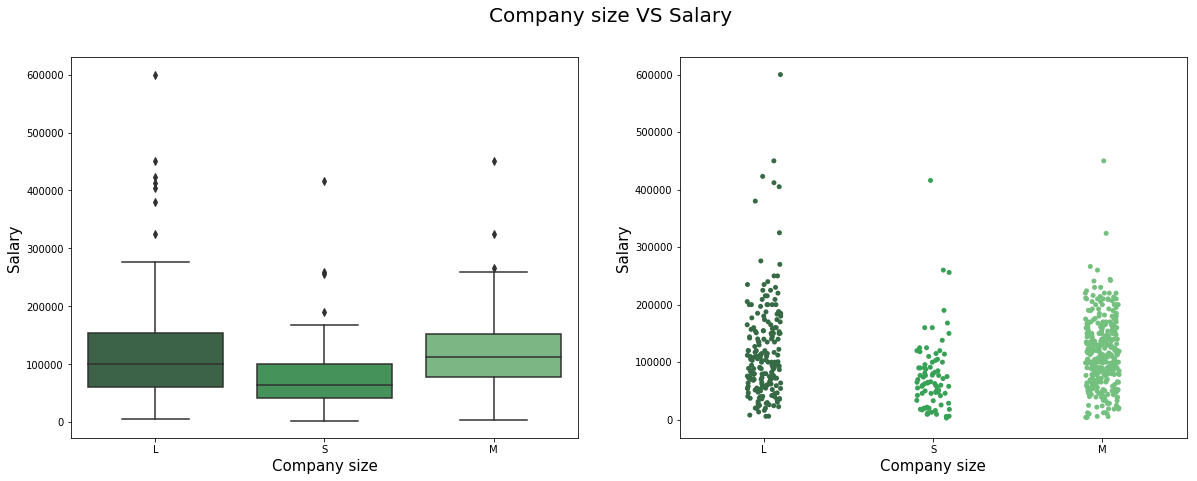

In [18]:
univariate_multi_plot(x="company_size",xlabel="Company size",y="salary",ylabel="Salary",palette="Greens_d",title="Company size VS Salary")

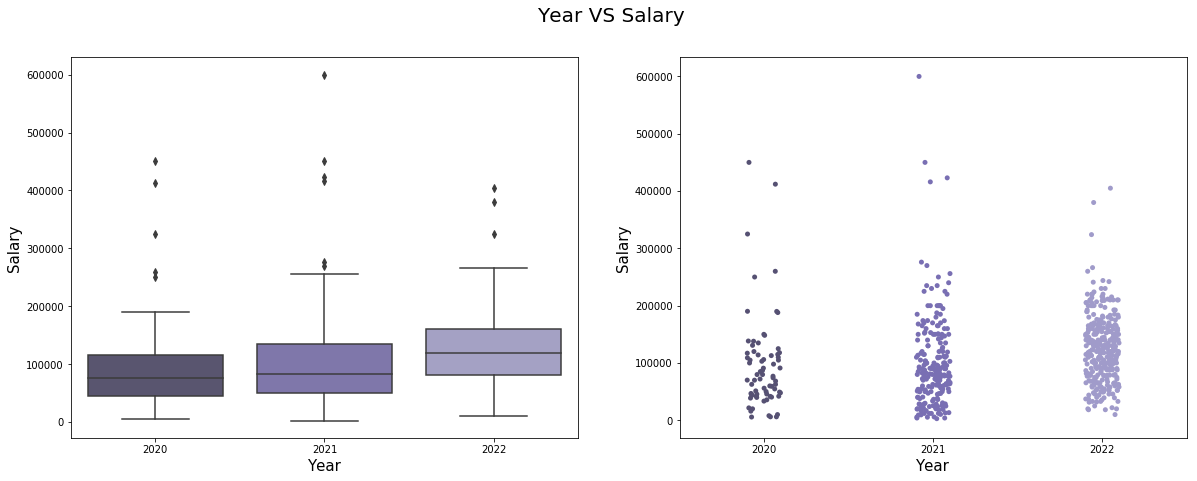

In [19]:
univariate_multi_plot(x="work_year",xlabel="Year",y="salary",ylabel="Salary",palette="Purples_d",title="Year VS Salary")

Text(0.5,6.8,'Count')

<Figure size 1440x648 with 0 Axes>

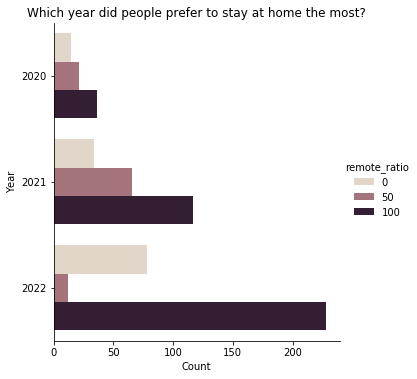

In [20]:
plt.figure(figsize=(20,9))
sns.catplot(y="work_year", hue="remote_ratio", kind="count",palette="ch:.25",data=df)
plt.title("Which year did people prefer to stay at home the most?")
plt.ylabel("Year")
plt.xlabel("Count")

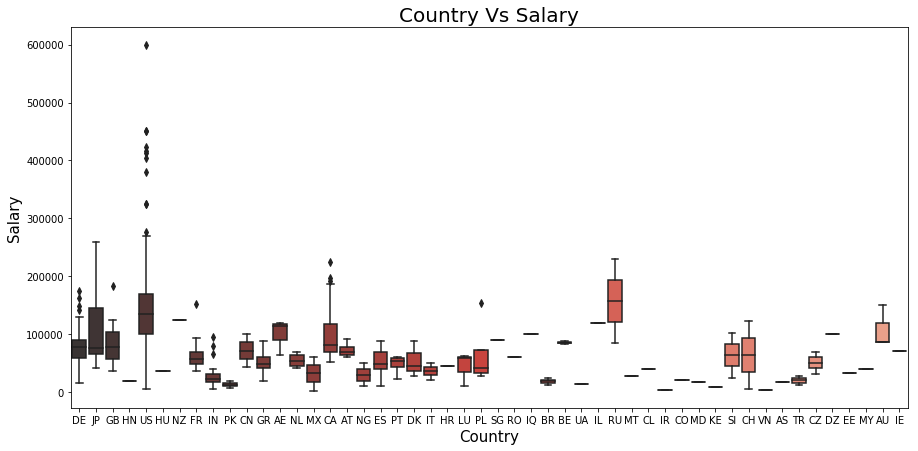

In [21]:
plt.figure(figsize=(15,7))
sns.boxplot(data=df, x='company_location', y='salary',palette="Reds_d")
plt.xlabel("Country",fontsize=15)
plt.ylabel("Salary",fontsize=15)
plt.title("Country Vs Salary",fontsize=20)
plt.show()

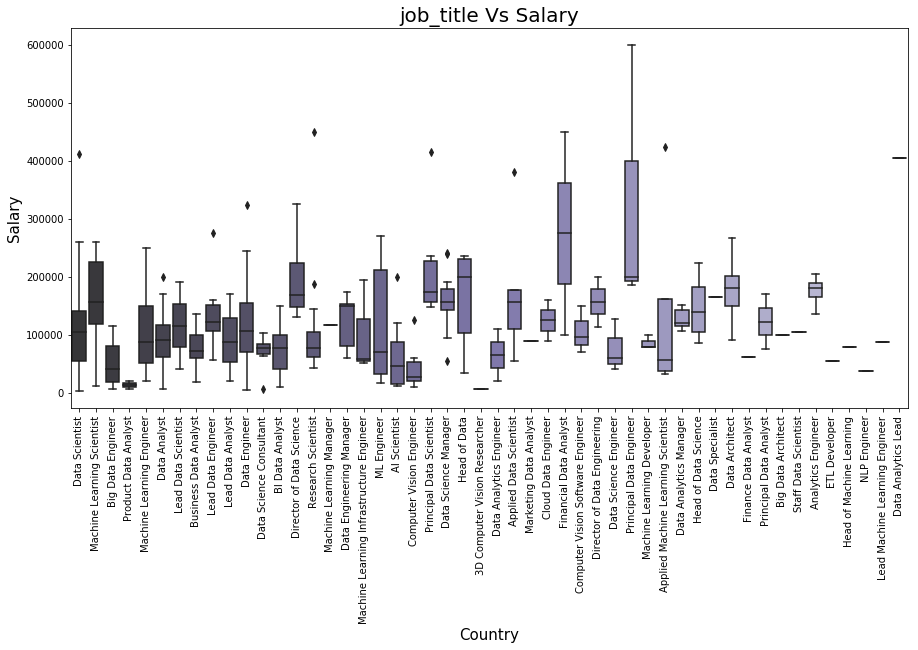

In [22]:
plt.figure(figsize=(15,7))
sns.boxplot(data=df, x='job_title', y='salary',palette="Purples_d")
plt.xticks(rotation = 90)
plt.xlabel("Country",fontsize=15)
plt.ylabel("Salary",fontsize=15)
plt.title("job_title Vs Salary",fontsize=20)
plt.show()

In [23]:
#converting object type into category
df['work_year']=df['work_year'].astype('category')
df['experience_level']=df['experience_level'].astype('category')
df['employment_type']=df['employment_type'].astype('category')
df['job_title']=df['job_title'].astype('category')
df['remote_ratio']=df['remote_ratio'].astype('category')
df['company_location']=df['company_location'].astype('category')
df['company_size']=df['company_size'].astype('category')
df['employee_residence']=df['employee_residence'].astype('category')

df.info()
#label encoding
df['work_year']=df['work_year'].cat.codes
df['experience_level']=df['experience_level'].cat.codes
df['employment_type']=df['employment_type'].cat.codes
df['job_title']=df['job_title'].cat.codes
df['remote_ratio']=df['remote_ratio'].cat.codes
df['company_location']=df['company_location'].cat.codes
df['company_size']=df['company_size'].cat.codes
df['employee_residence']=df['employee_residence'].cat.codes
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   work_year           607 non-null    category
 1   experience_level    607 non-null    category
 2   employment_type     607 non-null    category
 3   job_title           607 non-null    category
 4   salary              607 non-null    int64   
 5   employee_residence  607 non-null    category
 6   remote_ratio        607 non-null    category
 7   company_location    607 non-null    category
 8   company_size        607 non-null    category
dtypes: category(8), int64(1)
memory usage: 19.0 KB


,work_year,experience_level,employment_type,job_title,salary,employee_residence,remote_ratio,company_location,company_size
0,0,2,2,22,79833,14,0,12,0
1,0,3,2,41,260000,32,0,29,2
2,0,3,2,7,109024,20,1,18,1
3,0,2,2,47,20000,23,0,20,2
4,0,3,2,38,150000,55,1,48,0


In [24]:
#calculating the three quartiles
Q1 = np.percentile(df["salary"], 25, interpolation = 'midpoint')
Q2 = np.percentile(df["salary"], 50, interpolation = 'midpoint')  
Q3 = np.percentile(df["salary"], 75, interpolation = 'midpoint')
IQR = Q3 - Q1 #calculating inter-quartile range
print('Interquartile range is', IQR)
low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR
print('low_limit is', low_lim)
print('up_limit is', up_lim)
outlier =[]
for x in df["salary"]:
    if ((x> up_lim) or (x<low_lim)):
         outlier.append(x)
print(' outlier in the dataset is', outlier) #printing outliers

Interquartile range is 87274.0
low_limit is -68185.0
up_limit is 280911.0
 outlier in the dataset is [325000, 450000, 412000, 450000, 423000, 416000, 600000, 324000, 380000, 405000]


In [25]:
df.drop(df[df['salary'] >= 324000].index, inplace = True) #dropping outliers

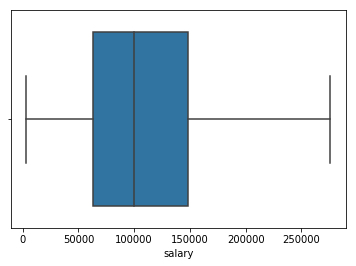

In [26]:
sns.boxplot(x='salary',data=df)

In [27]:
corr=df.corr()
corr.style.background_gradient(cmap='coolwarm')

,work_year,experience_level,employment_type,job_title,salary,employee_residence,remote_ratio,company_location,company_size
work_year,1.000000,0.301883,0.008951,-0.149806,0.266883,0.205212,0.075312,0.192407,0.074459
experience_level,0.301883,1.000000,-0.063022,0.032932,0.408545,0.232076,0.056163,0.252592,-0.063521
employment_type,0.008951,-0.063022,1.000000,-0.074783,-0.084393,-0.105971,-0.038247,-0.078396,0.064673
job_title,-0.149806,0.032932,-0.074783,1.000000,0.110654,-0.127714,-0.057718,-0.156308,-0.041579
salary,0.266883,0.408545,-0.084393,0.110654,1.000000,0.484877,0.134026,0.459563,-0.127788
employee_residence,0.205212,0.232076,-0.105971,-0.127714,0.484877,1.000000,0.154435,0.896672,-0.074613
remote_ratio,0.075312,0.056163,-0.038247,-0.057718,0.134026,0.154435,1.000000,0.166514,0.028706
company_location,0.192407,0.252592,-0.078396,-0.156308,0.459563,0.896672,0.166514,1.000000,-0.059586
company_size,0.074459,-0.063521,0.064673,-0.041579,-0.127788,-0.074613,0.028706,-0.059586,1.000000


In [28]:
df2 = pd.get_dummies(df)

In [29]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

y=df2['salary']
x=df2.drop(['salary'],axis=1)
x = scaler.fit_transform(x)

In [30]:
pip install xgboost


The following command must be run outside of the IPython shell:

    $ pip install xgboost

The Python package manager (pip) can only be used from outside of IPython.
Please reissue the `pip` command in a separate terminal or command prompt.

See the Python documentation for more information on how to install packages:

    https://docs.python.org/3/installing/


In [39]:
#Regression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge,Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import ExtraTreeRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.preprocessing import normalize,scale
def regression_(x,y):
    
    lr=LinearRegression()
    r=Ridge()
    l=Lasso()
    e=ElasticNet()
    kn=KNeighborsRegressor()
    et=ExtraTreeRegressor()
    gb=GradientBoostingRegressor()
    dt=DecisionTreeRegressor()
    xgb=XGBRegressor()
    rf =RandomForestRegressor()
       
    algos=[lr,r,l,e,kn,et,gb,dt,xgb,rf]
    algos_names=['LinearRegressor','Ridge','Lasso','ElasticNet','KNeighbors','ExtraTree','GradientBoosting',
                 'DecisionTree','XGB', 'Random Forest']
    
    #x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)
    
    r_score=[]
    mse=[]
    mae=[]
    
    result=pd.DataFrame(columns=['R_square','MSE','MAE'],index=algos_names)
    
    for algo in algos:
        pred = algo.fit(x,y).predict(x)
        r_score.append(r2_score(y,pred))
        mse.append(mean_squared_error(y,pred)**.5)
        mae.append(mean_absolute_error(y,pred))
    
    
    result.R_square=r_score
    result.MSE=mse
    result.MAE=mae
    
    return result.sort_values('R_square',ascending=False)

In [40]:
regression_(x,y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:890: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.object)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1055: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sample_mask = np.ones((n_samples, ), dtype=np.bool)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\base.py:157: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)


,R_square,MSE,MAE
ExtraTree,0.849690,22682.838034,12196.088638
DecisionTree,0.849690,22682.838034,12196.088638
XGB,0.848198,22795.141496,12942.455694
Random Forest,0.793077,26613.895142,18822.239989
GradientBoosting,0.733372,30210.435747,22532.324765
KNeighbors,0.534846,39902.671410,30090.461977
LinearRegressor,0.377532,46159.621598,35675.945080
Lasso,0.377532,46159.624062,35676.448348
Ridge,0.377425,46163.600575,35695.875104
ElasticNet,0.186658,52764.331924,42148.193854
